#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot_2samples
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [2]:
df = pd.read_csv('C:/Users/akash/Desktop/Scaler/Case_Study/Yulu/yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### No missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
print("season - %s"  %df['season'].unique())
print("holiday - %s"  %df['holiday'].unique())
print("workingday - %s"  %df['workingday'].unique())
print("Weather - %s"  %df['weather'].unique())

season - [1 2 3 4]
holiday - [0 1]
workingday - [0 1]
Weather - [1 2 3 4]


#### Converting Categorical values to object

In [5]:
df['season'] = df['season'].astype('object')
df['holiday'] = df['holiday'].astype('object')
df['workingday'] = df['workingday'].astype('object')
df['Weather'] = df['season'].astype('object')

In [6]:
df.describe(include = ['int64' , 'float64', 'object'])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Weather
count,10886,10886.0,10886.0,10886.0,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0
unique,10886,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,10-01-2012 09:00,4.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
freq,1,2734.0,10575.0,7412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734.0
mean,NaN,NaN,NaN,NaN,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,NaN
std,NaN,NaN,NaN,NaN,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,NaN
75%,NaN,NaN,NaN,NaN,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,NaN


#### Checking for outliers in casual and registered as their meian and mean have significant difference.

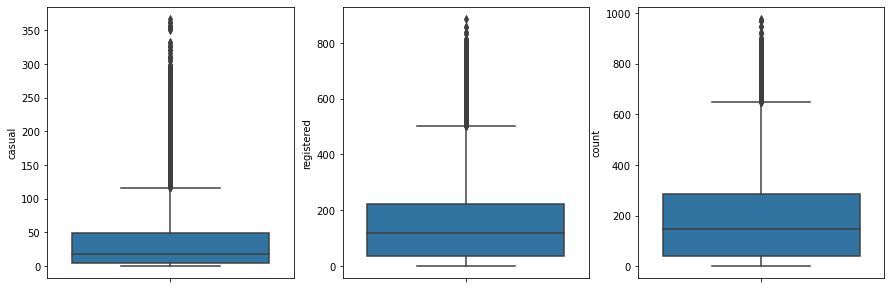

In [7]:
l = ['casual','registered','count']
fig,axs = plt.subplots(ncols = 3, nrows = 1,figsize=(15,5))
index=0
for i in l:
    sns.boxplot(y = i , data = df , ax = axs[index])
    index=index+1

In [8]:
Upper_bound_C = (1.5*stats.iqr(df['casual']))+np.quantile(df['casual'],0.75)
Upper_bound_R = (1.5*stats.iqr(df['registered']))+np.quantile(df['registered'],0.75)
Upper_bound_Co = (1.5*stats.iqr(df['count']))+np.quantile(df['count'],0.75)
print('No of Outliers for casual - %s' %len(df.loc[df['casual']>Upper_bound_C]))
print('No of Outliers for registered - %s' %len(df.loc[df['registered']>Upper_bound_R]))
print('No of Outliers for count - %s' %len(df.loc[df['count']>Upper_bound_Co]))

No of Outliers for casual - 749
No of Outliers for registered - 423
No of Outliers for count - 300


#### Temp have positive correlation with count
#### humidity have negative correlation with count

<AxesSubplot:>

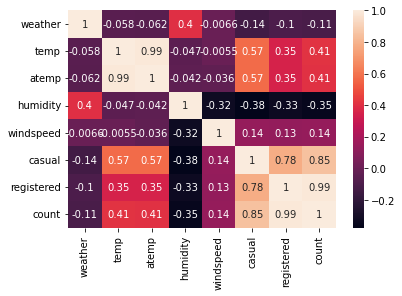

In [9]:
sns.heatmap(df.corr(method="spearman"),annot=True)

#### We cant remove all of these as it is 10 percent of our data.

In [10]:
(len(df[(df['casual']>Upper_bound_C) | (df['registered']>Upper_bound_R) | (df['count']>Upper_bound_Co)])/len(df))*100

10.490538306081206

#### Lets check for common rows which have outlier in all 3 columns -- As it is only .275 percent ,this we can remove it from dataframe

In [11]:
(len(df[(df['casual']>Upper_bound_C) & (df['registered']>Upper_bound_R) & (df['count']>Upper_bound_Co)])/len(df))*100

0.275583318023149

In [12]:
drop = df[(df['casual']>Upper_bound_C) & (df['registered']>Upper_bound_R) & (df['count']>Upper_bound_Co)].index
df.drop(drop,inplace=True)

#### As we see here count is mostly high in weather 1 and weather 2
#### As per season count is mostly high in season 2 and season 3

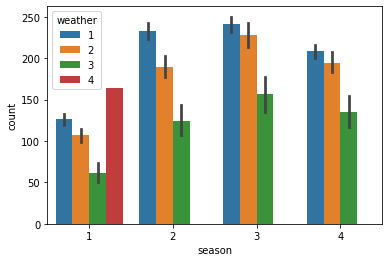

In [13]:
sns.barplot(x='season',y='count',hue='weather',data=df)
plt.show()

#### Working Day has effect on number of electric cycles rented

#### The mean looks more are less same as per the graph lets do Hypothesis test to find out

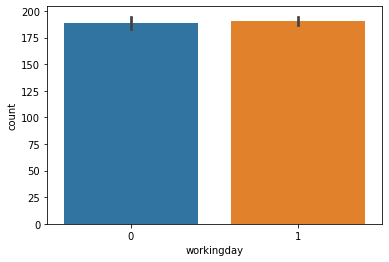

In [14]:
sns.barplot(y='count',x='workingday',data=df)
plt.show()

### T- Test - two sided

Assuming counts of cycle for different datetime is independent events

Null Hypothessis is both population mean of number of cycles/bikes rented are same for Working and non working.

Alternative Hypothesis is both population mean of number of cycles/bikes rented are not equal for Working and non working.

Significance = 5%

In [15]:
df_working = df[df['workingday'] == 1]
df_nonworking = df[df['workingday'] == 0]

workingday 0 Variance is 30086.950350982017
workingday 1 Variance is 32668.883306255997


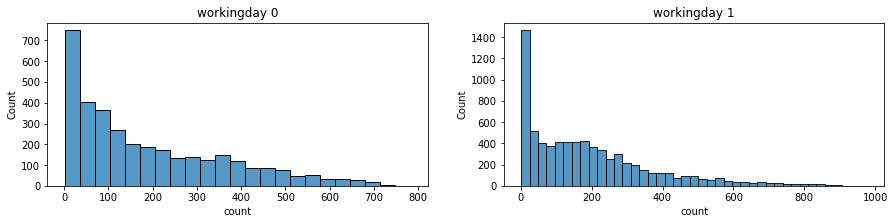

In [16]:
fig,axs = plt.subplots(nrows = 1,ncols = 2,figsize=(15,3))
index = 0
axs = axs.flatten()
for i in range(0,2):
    sns.histplot(x = 'count',data= df[df['workingday']==i],ax = axs[index]).set(title = "workingday {}".format(i))
    print("workingday {} Variance is {}".format(i,np.var(df[df['workingday']==i]['count'])))
    index=index+1
plt.show()

In [17]:
stats.ttest_ind(df_working['count'],df_nonworking['count'])

Ttest_indResult(statistic=0.6161762184303081, pvalue=0.5377911440927007)

#### pvalue is significantly greater than .05 , so we can conclude with it that both population mean are same.

### Anova

#### Weather  --  No. of cycles rented is similar or different in different weathers

In [18]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

#### We see noticeable differnce in sample mean

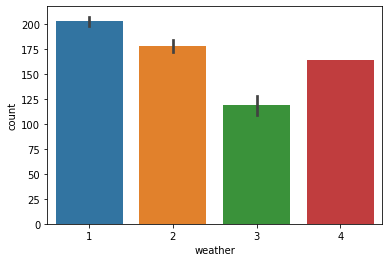

In [19]:
sns.barplot(y='count',x='weather',data=df)
plt.show()

Null Hypothesis -- All mean populations of the weather are same

Alternative Hypothesis -- Not all are equal

Significance level = 5% percent

In [20]:
df_1=df[df['weather']==1]
df_2=df[df['weather']==2]
df_3=df[df['weather']==3]
df_4=df[df['weather']==4]

In [21]:
df_4

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Weather
5631,09-01-2012 18:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,1


#### As we have only one observation under weather 4 will check for other weathers

Weather 1 Variance is 34101.0262353682
Weather 2 Variance is 27882.22433892511
Weather 3 Variance is 19182.418761290777


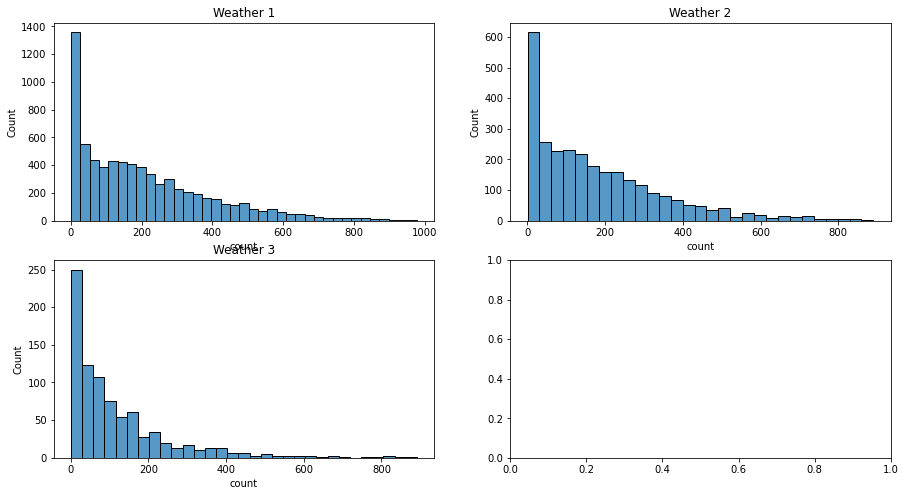

In [22]:
fig,axs = plt.subplots(nrows = 2,ncols = 2,figsize=(15,8))
index = 0
axs = axs.flatten()
for i in range(1,4):
    sns.histplot(x = 'count',data= df[df['weather']==i],ax = axs[index]).set(title = "Weather {}".format(i))
    print("Weather {} Variance is {}".format(i,np.var(df[df['weather']==i]['count'])))
    index=index+1
plt.show()

##### Lets do boxcox and try to make it as Approximately Normal dist then will perform Anova
##### we have variations but approximately we can go with this data.

Weather 1 Variance is 40.66658225318325
Weather 2 Variance is 30.399127429155563
Weather 3 Variance is 10.474445485951652


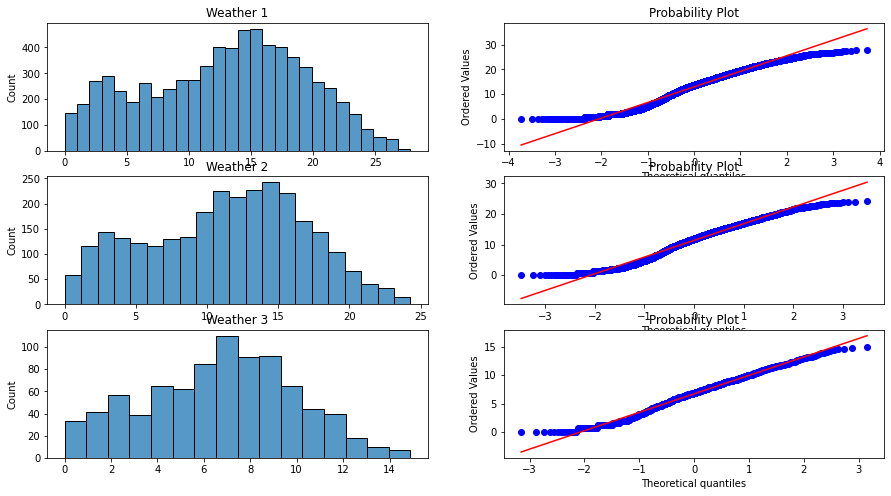

In [23]:
fig,axs = plt.subplots(nrows = 3,ncols = 2,figsize=(15,8))
index = 0
axs = axs.flatten()
boxcox =[]
for i in range(1,4):
    f,h = stats.boxcox(df[df['weather']==i]['count'])
    boxcox.append(f)
    sns.histplot(x = f ,ax = axs[index]).set(title = "Weather {}".format(i))
    print("Weather {} Variance is {}".format(i,np.var(f)))
    index=index+1
    stats.probplot(f, dist="norm", plot =axs[index])
    index+=1
plt.show()

#### As P-Value is lesser than 0.05 we reject Null Hypothesis , Population means are not same.

In [24]:
stats.f_oneway(boxcox[0],boxcox[1],boxcox[2])

F_onewayResult(statistic=440.1904898946861, pvalue=1.537464542423308e-184)

#### As we know population mean for all weathers are not equal and from above we discovered approximated weather 1 and weather 2 have high mean lets do Hypothesis testing on these 2 weathers

#### T-Test -- One Sided
Null Hypothesis -- weather1 and weather2 population mean are same for number of bikes.

Alternative Hypothesis -- weather1 population mean for number of bikes is greater than weather2 population mean for number of bikes.

Significance value = 5%

In [25]:
stats.ttest_ind(df_1['count'],df_2['count'],alternative='greater')

Ttest_indResult(statistic=6.202267793294654, pvalue=2.8929219970924407e-10)

As pvalue is lesser than 0.05 we reject NULL Hypothesis and confirm that weather1 population mean is greater than weather2 population 

#### Season  --  No. of cycles rented is similar or different in different seasons

In [26]:
df['season'].value_counts()

4    2731
3    2721
2    2720
1    2684
Name: season, dtype: int64

#### We see noticeable differnce in sample mean

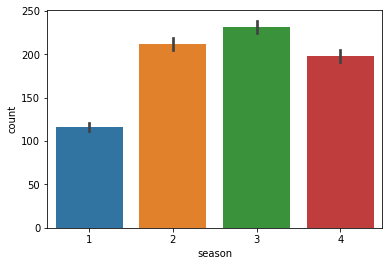

In [27]:
sns.barplot(y='count',x='season',data=df)
plt.show()

Null Hypothesis -- All mean populations of the season are same

Alternative Hypothesis -- Not all are equal

Significance level = 5% percent

Season 1 Variance is 15359.425644682515
Season 2 Variance is 35472.23384934581
Season 3 Variance is 37500.967107748525
Season 4 Variance is 31069.4493361209


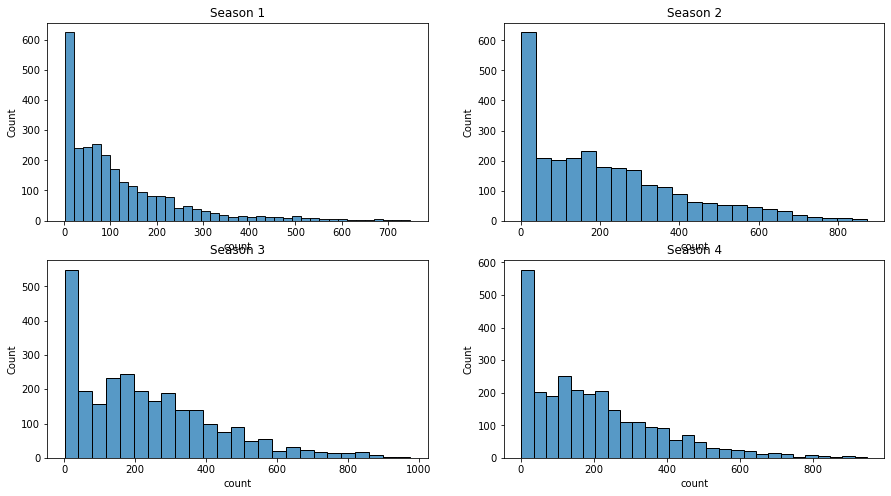

In [28]:
fig,axs = plt.subplots(nrows = 2,ncols = 2,figsize=(15,8))
index = 0
axs = axs.flatten()
for i in range(1,5):
    sns.histplot(x = 'count',data= df[df['season']==i],ax = axs[index]).set(title = "Season {}".format(i))
    print("Season {} Variance is {}".format(i,np.var(df[df['season']==i]['count'])))
    index=index+1
plt.show()

##### Lets do boxcox and try to make it as Approximately Normal dist then will perform Anova

Season 1 Variance is 16.433125091465634
Season 2 Variance is 45.6556456476883
Season 3 Variance is 68.15519702828756
Season 4 Variance is 43.02474985412279


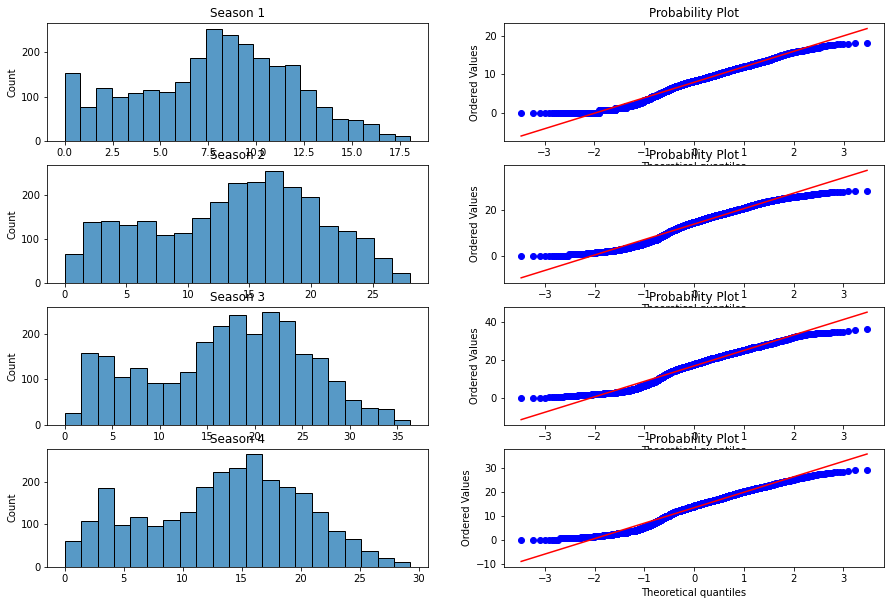

In [29]:
fig,axs = plt.subplots(nrows = 4,ncols = 2,figsize=(15,10))
index = 0
axs = axs.flatten()
boxcox =[]
for i in range(1,5):
    f,h = stats.boxcox(df[df['season']==i]['count'])
    boxcox.append(f)
    sns.histplot(x = f ,ax = axs[index]).set(title = "Season {}".format(i))
    print("Season {} Variance is {}".format(i,np.var(f)))
    index=index+1
    stats.probplot(f, dist="norm", plot =axs[index])
    index+=1
plt.show()

#### As P-Value is lesser than 0.05 we reject Null Hypothesis , Population means are not same.

In [30]:
stats.f_oneway(boxcox[0],boxcox[1],boxcox[2],boxcox[3])

F_onewayResult(statistic=901.2720662453708, pvalue=0.0)

#### As we know population mean for all seasons are not equal and from above we discovered approximated season 2 and season 3 have high mean lets do Hypothesis testing on these 2 seasons

#### T-Test -- One Sided
Null Hypothesis -- season2 and season3 population mean for number of bikes are same.

Alternative Hypothesis -- season3 population mean for number of bikes is greater than season2 population mean for number of bikes.

Significance value = 5%

In [31]:
stats.ttest_ind(df[df['season'] == 3]['count'],df[df['season'] == 2]['count'],alternative='greater')

Ttest_indResult(statistic=3.729353817838736, pvalue=9.696243142925167e-05)

As pvalue is lesser than 0.05 we reject NULL Hypothesis and confirm that season3 population mean is greater than season2 population 

### CHI - Square Test

#### Checking if Weather is dependent on the season 

Null Hypothesis -- season and weather are independent

Alternative Hypothesis -- season and weather are dependent

Significance = 5%

In [32]:
ct = pd.crosstab(df['season'],df['weather'])
ct

weather,1,2,3,4
season,,,,
1,1757,715,211,1
2,1788,708,224,0
3,1921,601,199,0
4,1699,807,225,0


#### As P-Value is lesser than 0.05 we reject Null Hypothesis , season and weather are dependent

In [33]:
t_stat,pvalue,dof,expected = stats.chi2_contingency(ct)
print("P-Value is {}".format(pvalue))
print("Chi-square_statistics is {}".format(t_stat))
print()
print("----------Expected Values-----------")
pd.DataFrame(expected) 

P-Value is 1.4072239516222583e-07
Chi-square_statistics is 49.38223405442044

----------Expected Values-----------


,0,1,2,3
0,1771.449889,699.926676,212.376197,0.247237
1,1795.210022,709.314665,215.224761,0.250553
2,1795.870026,709.575442,215.303887,0.250645
3,1802.470063,712.183217,216.095155,0.251566


#### Whether Number of cycles rented in waether is dependent on Number of rented in season

In [34]:
df1 = df[~(df['weather'] == 4)]
ct = pd.pivot_table(data = df1, index = 'season', columns = 'weather',aggfunc=np.sum)['count']
ct

weather,1,2,3
season,,,
1,221426,76406,12919
2,416195,134177,27755
3,462924,136821,31160
4,353963,157191,30255


#### Chi-square_statistics is very high and P value is zero so there is very strong conclusion that these 2 are related.

In [35]:
t_stat,pvalue,dof,expected = stats.chi2_contingency(ct)
print("P-Value is {}".format(pvalue))
print("Chi-square_statistics is {}".format(t_stat))
print()
print("----------Expected Values-----------")
pd.DataFrame(expected) 

P-Value is 0.0
Chi-square_statistics is 10802.911433682099

----------Expected Values-----------


,0,1,2
0,219285.644185,76074.136153,15391.219663
1,407963.133234,141529.752476,28634.114291
2,445206.642438,154450.196039,31248.161523
3,382052.580144,132540.915332,26815.504524


#### temp vs weather and season

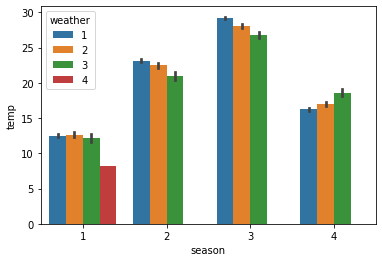

In [36]:
sns.barplot(x='season',y='temp',hue='weather',data=df)
plt.show()

#### Lets check population mean of temp between weather1 and weather2 , season2 and season3

#### One sided T-Test 

Null Hypothesis -- season2 and season3 population mean for temp are same.

Alternative Hypothesis -- season3 population mean of temp is greater than season2 population mean of temp.

Significance value = 5%

In [37]:
stats.ttest_ind(df[df['season'] == 3]['temp'],df[df['season'] == 2]['temp'],alternative='greater')

Ttest_indResult(statistic=48.17366279423885, pvalue=0.0)

#### Season 3 have mean temp greater than season 2, As pvalue is lesser than 0.05

With same set up but instead of season 2 lets check with season 1 and season 4

In [38]:
stats.ttest_ind(df[df['season'] == 3]['temp'],df[df['season'] == 1]['temp'],alternative='greater')

Ttest_indResult(statistic=130.59859318642657, pvalue=0.0)

In [39]:
stats.ttest_ind(df[df['season'] == 3]['temp'],df[df['season'] == 4]['temp'],alternative='greater')

Ttest_indResult(statistic=103.24270640527541, pvalue=0.0)

#### Season 3 have mean temp greater than season 1 and season 4 , As pvalue is lesser than 0.05

#### One sided T-Test 

Null Hypothesis -- weather1 and weather2 population mean for temp are same.

Alternative Hypothesis -- weather1 population mean of temp is greater than weather2 population mean of temp.

Significance value = 5%

In [40]:
stats.ttest_ind(df[df['weather'] == 1]['temp'],df[df['weather'] == 2]['temp'],alternative='greater')

Ttest_indResult(statistic=5.317100387752267, pvalue=5.3854527146646476e-08)

#### Weather 1 have mean temp greater than weather 2 as pvalue is lesser than 0.05

With same set up but instead of weather 2 lets check with weather 3 

In [41]:
stats.ttest_ind(df[df['weather'] == 1]['temp'],df[df['weather'] == 3]['temp'],alternative='greater')

Ttest_indResult(statistic=3.417921895115183, pvalue=0.0003170743930708656)

#### Weather 1 have mean temp greater than weather 3 as pvalue is lesser than 0.05

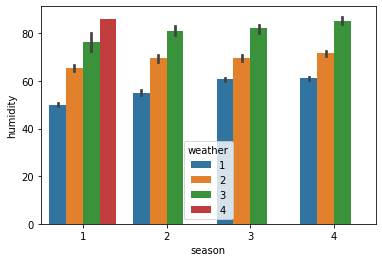

In [42]:
sns.barplot(x='season',y='humidity',hue='weather',data=df)
plt.show()

#### One sided T-Test 

Null Hypothesis -- weather1 and weather2 population mean for humidity are same.

Alternative Hypothesis -- weather1 population mean of humidity is lesser than weather2 population mean of humidity.

Significance value = 5%

In [43]:
stats.ttest_ind(df[df['weather'] == 1]['humidity'],df[df['weather'] == 2]['humidity'],alternative='less')

Ttest_indResult(statistic=-31.68480268442733, pvalue=2.4419351964198334e-210)

#### weather 1 mean population for humidity is lesser than weather 2 as pvalue is lesser than 0.05

With same set up but instead of weather 2 lets check with weather 3 

In [44]:
stats.ttest_ind(df[df['weather'] == 1]['humidity'],df[df['weather'] == 3]['humidity'],alternative='less')

Ttest_indResult(statistic=-38.46973136343918, pvalue=1.3444440531767446e-297)

#### weather 1 mean population for humidity is lesser than weather 3 as pvalue is lesser than 0.05

#### One sided T-Test 

Null Hypothesis -- season2 and season3 population mean for humidity are same.

Alternative Hypothesis -- season3 population mean of humidity is lesser than season2 population mean of humidity.

Significance value = 5%

In [45]:
stats.ttest_ind(df[df['season'] == 3]['humidity'],df[df['season'] == 2]['humidity'],alternative='less')

Ttest_indResult(statistic=6.3254244099668515, pvalue=0.9999999998636447)

#### Season 3 and season 2 population mean are same as pvalue is much hihger than 0.05

With same set up but instead of season 2 lets check with season 1 and season 4

In [46]:
stats.ttest_ind(df[df['season'] == 3]['humidity'],df[df['season'] == 1]['humidity'],alternative='less')

Ttest_indResult(statistic=15.501248179964632, pvalue=1.0)

In [47]:
stats.ttest_ind(df[df['season'] == 3]['humidity'],df[df['season'] == 4]['humidity'],alternative='less')

Ttest_indResult(statistic=-4.202109168200038, pvalue=1.343331995600396e-05)

#### As per season it doesnt seems to follow the trend as no of bikes increases in one seaon and humidity decreases 